5.딥러닝 수행 결과 분석 및 및 시각화 (10점)   

다양한 방식으로 딥러닝을 수행한 코딩 중에서 가장 성능이 좋은 딥러닝을 대상으로 분석 및 시각화 작업을 수행

파일명 : 5_Deep learning results.ipynb   

# 딥러닝 결과 시각화 및 분석

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import matplotlib.font_manager
import seaborn as sns

In [22]:
os.getcwd()

'D:\\ai\\Final'

In [23]:
history=pd.read_csv("./history/result_1.csv")

In [24]:
history

,loss,accuracy,val_loss,val_accuracy
0,0.693012,0.516616,0.696327,0.457831
1,0.692625,0.519637,0.697195,0.457831
2,0.692603,0.516616,0.695723,0.457831
3,0.692209,0.519637,0.694532,0.469880
4,0.692148,0.537764,0.694106,0.481928
...,...,...,...,...
81,0.668287,0.592145,0.689639,0.566265
82,0.669924,0.580060,0.705023,0.530120
83,0.667029,0.595166,0.682539,0.530120
84,0.669817,0.592145,0.684660,0.481928


# 학습 데이터셋과 테스트 데이터셋 전체 결과 비교

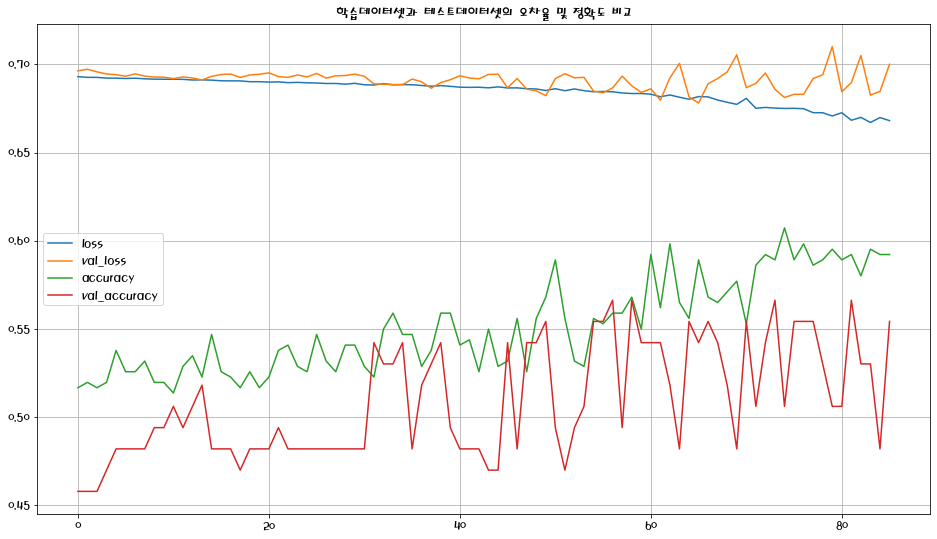

In [77]:
plt.rc('font',family=font_name,size=12)
plt.figure(figsize=(16,9))
plt.title('학습데이터셋과 테스트데이터셋의 오차율 및 정확도 비교', fontsize=14)

plt.plot(history['loss'])      # 학습 데이터셋의 loss   -> loss 
plt.plot(history['val_loss'])  # 테스트 데이터셋의 loss -> val_loss

plt.plot(history['accuracy'])      # 학습 데이터셋의 accuracy    -> accuracy 
plt.plot(history['val_accuracy'])  # 테스트 데이터셋의 accuracy  -> val_accuracy 

plt.legend(['loss','val_loss','accuracy', 'val_accuracy' ])     # 범례
plt.grid()
plt.show()

굉장히 뒤죽박죽임을 알 수 있다.  

1.loss : 줄고 있기는 하나, 그 변화가 미미하다.  
2.val_loss : 마찬가지로 추이를 보면 줄고 있으나, 그 변화가 미미하며, 진동이 굉장히 심하다.  
3.accuracy : 상승하는 추이를 보인다. 0.1정도의 변화가 있었으나, 큰 변화는 아니다.  
4.val_accuracy : 마찬가지로 상승하는 추이를 보인다. 비슷하게 0.1 정도의 변화가 있었으나, 큰 변화는 아니며, 진동 낙차가 크다.  

# 학습 데이터셋과 테스트 데이터셋의 정확도 비교

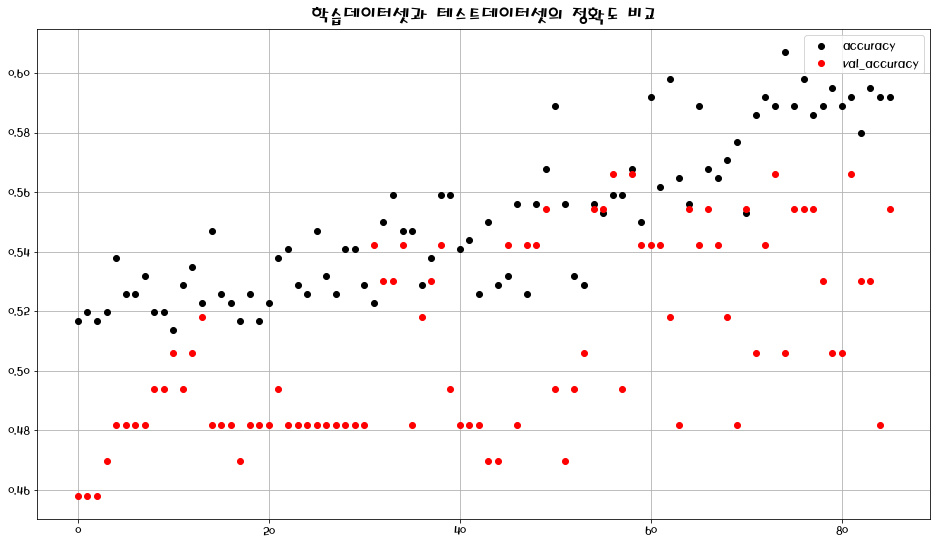

In [71]:
font_path = "C:\\Windows\\Fonts\\HMKMMAG.TTF"
font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()

plt.rc('font',family=font_name,size=12)
plt.figure(figsize=(16,9))
plt.title('학습데이터셋과 테스트데이터셋의 정확도 비교', fontsize=20)

plt.plot(history['accuracy'],"o",color="black")
plt.plot(history['val_accuracy'],"o",color="red")

plt.legend(['accuracy', 'val_accuracy' ])   # 범례
plt.grid()

plt.show()

accuracy와 val_accuracy 모두 상승하는 추이를 보이는 것 같기는 하나, 정확하지는 않다.

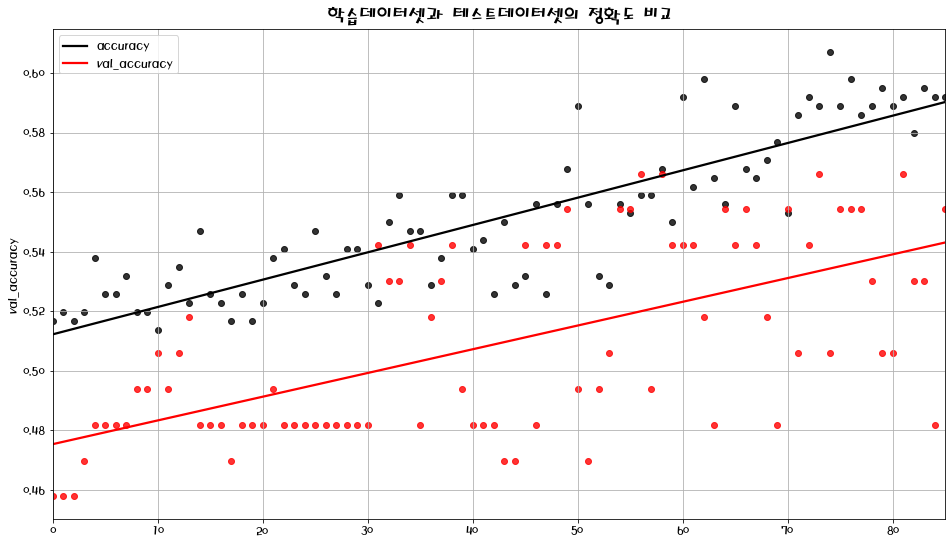

In [73]:
font_path = "C:\\Windows\\Fonts\\HMKMMAG.TTF"
font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()

plt.rc('font',family=font_name,size=12)
plt.figure(figsize=(16,9))
plt.title('학습데이터셋과 테스트데이터셋의 정확도 비교', fontsize=20)

sns.regplot(x=history.index, y=history['accuracy'], fit_reg=True,ci=None,color='black') # 추세선
sns.regplot(x=history.index, y=history['val_accuracy'], fit_reg=True,ci=None,color='red') # 추세선

plt.legend(['accuracy', 'val_accuracy' ])     # 범례
plt.grid()

plt.show()

추세선을 그려주고 나니, accuracy와 val_accuracy 둘다 상승한 것을 확인할 수 있었다.  
가장 낮은 것과, 가장 높은 것을 비교해보면 둘다 약 0.1 상승한 것 같다.

# 프로젝트 결과 총 정리

주가가 오르냐 안 오르냐를 예측하는 이번 프로젝트는 썩 그리 좋은 결과를 가져다주지는 않았다.  

window_size와 batch_size를 조절해가며 12개의 딥러닝 모델에 대한 딥러닝을 실행했다.  

하지만 모델 대부분의 정확도는 유의미한 결과를 보이지 못했다.  

몇몇 모델의 경우, 찍느니만 못 한 50% 미만이라는 결과를 보여주기도 했다.  

그러나 두 개의 모델에서 그렇게 좋은 결과는 아니지만, 다른 모델에 비해 나은 정확도를 보여주었다.  

그 중 하나를 골라 시각화 해본 결과, loss와 val_loss에서 눈에 띄는 변화를 보이지는 않았다.

불행 중 다행인 것이, accuracy와 val_accuracy는 나름 괜찮은 변화를 보였다.  

그래봤자 60%도 되지 않는 정확도 이지만, 추세선을 그려 추세를 봤을 때, 분명히 상승하는 모습을 볼 수 있었다.  


추가로, 이 프로젝트의 데이터에게만 그렇거나, 시계열 데이터에게만 그런 걸 수도 있지만,  
꼭 batck_size가 크다고 좋은 것도 아니고, window_size다 크다고 좋은 건 아닌 것 같다.  
그 반대도 마찬가지다.

# 프로젝트 종료 후, 스스로 해보는 피드백

1.일단 데이터의 양이 부족한 것 같다. 삼성전자가 몇 년 전에 액면분할을 해서, 주가가 많이 줄었었다. 따라서 제한된 기간의 데이터만 가지고 프로젝트를 진행할 수밖에 없었다.   

2.삼성전자를 선택하지 말았어야 했다. 삼성전자는 대한민국 시가총액 1위 기업인 만큼, 주가 데이터 말고도 여러가지 요인들이 영향을 주었을 것이라고 생각한다. 예를 들어, 뉴스와 같은 미디어나, 코스피 지수, 애플 같은 경쟁 기업의 주가 등등. 굉장히 많은 속성들이 있었을 것 같다.   

3.RNN에 대해서 깊게 공부하지 못한 것 같다. RNN, 특히 LSTM에 대해서 더 깊은 공부를 했다면, 더 좋은 딥러닝 결과가 나오지 않았을까 하는 아쉬움이 있다.  

# 번외로 해본 주가 예측

주가가 오르냐 안 오르냐가 프로젝트 주제이지만, 번외로 주가 예측을 진행해봤다.   
아래 사진을 보면 정확하지는 않지만, 꽤나 비슷한 흐름을 따라가는 것을 알 수 있다.

In [78]:
from IPython.display import Image

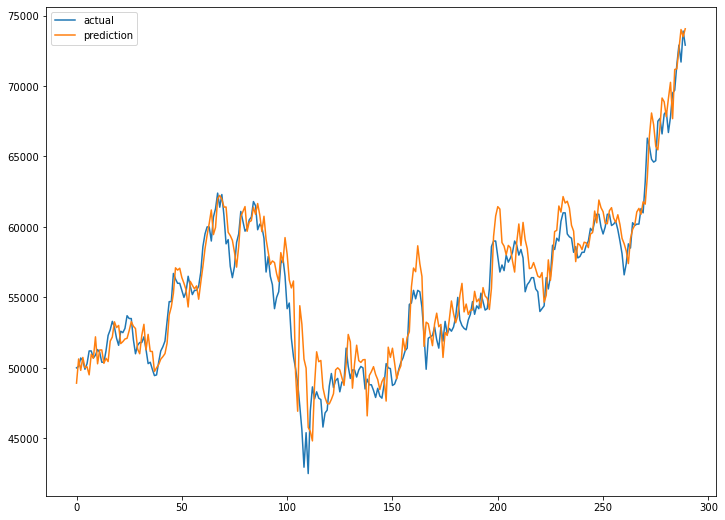

In [79]:
Image("./exception_graph.PNG")